In [1]:
from acquire_msc import get_all_readme_files_and_languages
from acquire_msc import get_alt
from prepare_readme_files import prepare_repo_html_data
from prepare_readme_files import basic_clean

import re
import unicodedata
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind as ttest
from wordcloud import WordCloud
from afinn import Afinn

In [2]:
url_list = ['microsoft/Terminal', 'jackfrued/Python-100-Days', 
    'kkuchta/css-only-chat', 'microsoft/PowerToys', 'jolaleye/cssfx', 
    'MisterBooo/LeetCodeAnimation', 'flutter/flutter_web', 
    'TheAlgorithms/Python', 'hiroppy/fusuma', 'CyC2018/CS-Notes', 
    'jaywcjlove/linux-command', 'flutter/flutter', '996icu/996.ICU', 
    'STVIR/pysot', 'minamarkham/formation', 'azl397985856/leetcode', 
    'qianguyihao/Web', 'react-native-windows', 'sql-machine-learning/sqlflow', 
    'sabakkps/backslide', 'dgryski/go-perfbook', 'Snailclimb/JavaGuide', 
    'microsoft/vscode', 'markphelps/flipt', 'teoga/awesome-product-design',
    'dianping/cat','catchorg/Catch2', 'nyaadevs/nyaa', 'jingweno/ccat', 
    'AlexiaJM/Deep-learning-with-cats', 'sharkdp/bat', 'CleverRaven/Cataclysm-DDA', 
    'typelevel/cats', 'catboost/catboost', 'catarse/catarse', 'websockets/wscat' ,
    'udacity/ud989-cat-clicker-premium-vanilla' ,'enigmampc/catalyst' ,
    'catapult-project/catapult','cesarferreira/CatKit', 'Rogero0o/CatLoadingView', 
    'CellularPrivacy/Android-IMSI-Catcher-Detector','ZacSweers/CatchUp', 'awgn/cat', 
    'mattsears/nyan-cat-formatter', 'rancher/community-catalog', 'Oros42/IMSI-catcher',
    'Catrobat/Catroid', 'junyanz/CatPapers', 'kubernetes-incubator/service-catalog',
    'rancher/cattle', 'nolanlawson/Catlog', 'Lunat1q/Catchem-PoGo',
    'interactivethings/catalog', 'windiest/Front-end-tutorial','TeMPOraL/nyan-mode',
    'x0rz/phishing_catcher', 'scikit-learn-contrib/categorical-encoding',
    'Mr-Un1k0d3r/DKMC', 'ros/catkin', 'Catel/Catel', 'typelevel/cats-effect',
    'typelevel/cats-mtl', 'skorokithakis/catt', 'PetoiCamp/OpenCat', 'ring0lab/catphish',
    'aleju/cat-generator', 'youzan/bugCatcher', 'mbcharbonneau/UIImage-Categories',
    'maxogden/javascript-for-cats', 'underscoreio/scala-with-cats','notwaldorf/cat-dns',
    'unidal/cat2', 'Externalizable/bongo.cat', 'rancher/rancher-catalog',
    'joaotavora/sly', 'developit/snarkdown', 'eleybourn/Book-Catalogue',
    'bendytree/Objective-C-RegEx-Categories','travisbrown/iteratee',
    'tinrab/meower','funcool/cats','SophieDeBenedetto/catbook-redux', 'easychen/catgate',
    'ypwhs/dogs_vs_cats', 'notwaldorf/caturday-post', 'catalyst-team/catalyst',
    'OpenExoplanetCatalogue/open_exoplanet_catalogue', 'jbaron/cats', 'typelevel/mouse',
    'callowayproject/django-categories', 'hapijs/catbox', 'Whales/Cataclysm',
    'lunaryorn/mdcat', 'sindresorhus/cat-names', 'keefo/CATweaker',
    'honcheng/CATransform3D-Test', 'stfalcon-studio/SmsVerifyCatcher',
    'typelevel/kittens', 'jerrykrinock/CategoriesObjC', 'cemolcay/CategorySliderView',
    'X-Wei/flutter_catalog', 'CatLib/CatLib', 'calvinmetcalf/catiline',
    'konifar/material-cat', 'letiantian/another-tutorial-about-java-web',
    'tpolecat/cats-infographic', 'catberry/catberry', 'Gibbsdavidl/CatterPlots',
    'Maescool/Catacomb-Snatch', 'secabstraction/PowerCat',
    'perl-catalyst/catalyst-runtime', 'simoninithomas/CatDCGAN', 'lexiross/fattest-cat',
    'CatacombGames/Catacomb3D', 'LiskArchive/lisk-commander',
    'rancher/catalog-dockerfiles', 'opencats/OpenCATS', 'cadejscroggins/catz',
    'atnos-org/eff', 'whatthejeff/nyancat-phpunit-resultprinter', 'posva/catimg']

afinn = Afinn()

Collect the languages and readme files listed for each repo

In [3]:
'''need to collect the languages before I have any extra stopwords...'''
extra_words = []
exclude_words = []

articles = get_alt(url_list)

transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

In [4]:
transformed_data[0].keys()

dict_keys(['title', 'language', 'original', 'clean'])

In [5]:
df.head(3)

,clean,language,original,title
0,welcome repository contains source code window...,C++,Welcome! This repository contains the source c...,microsoft/Terminal
1,python 100 python python c c python python jav...,HTML,Python - 100天从新手到大师\n\n作者：骆昊\n\nPython应用领域和就业形...,jackfrued/Python-100-Days
2,css chat truly monstrous async web chat using ...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,kkuchta/css-only-chat


Create a list of languages that are "cleaned" (lower case with no symbols) so that we can remove them from the readme texts.

In [6]:
clean_langs = []
for i in range(df.shape[0]):
    next_lang = transformed_data[i]['language'].lower()
    next_lang = re.sub(r'[^\w\s]', ' ', next_lang).strip()
    if next_lang not in clean_langs:
        clean_langs.append(next_lang)

In [7]:
clean_langs 

['c',
 'html',
 'ruby',
 'vue',
 'dart',
 'python',
 'javascript',
 'java',
 'rust',
 'go',
 'typescript',
 'scala',
 'kotlin',
 'smarty',
 'lua',
 'objective c',
 'tex',
 'common lisp',
 'clojure',
 'perl',
 'jupyter notebook',
 'shell',
 'php']

Remove languages from the readme files with another call to prepare_repo_html.

In [8]:
extra_words=clean_langs
transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

We now have a clean dataframe:

In [9]:
df.head() # dataframe

,clean,language,original,title
0,welcome repository contains source code window...,C++,Welcome! This repository contains the source c...,microsoft/Terminal
1,100 devops r matlab r lisp 20185 make english ...,HTML,Python - 100天从新手到大师\n\n作者：骆昊\n\nPython应用领域和就业形...,jackfrued/Python-100-Days
2,css chat truly monstrous async web chat using ...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,kkuchta/css-only-chat
3,css chat truly monstrous async web chat using ...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,microsoft/PowerToys
4,beautifully simple click copy css effects http...,Vue,Beautifully simple click-to-copy CSS effects\n...,jolaleye/cssfx


And a clean list of dictionaries:

In [10]:
transformed_data[0] # list of dictionaries

{'title': 'microsoft/Terminal',
 'language': 'C++',
 'original': 'Welcome! This repository contains the source code for:\n\nWindows Terminal\nThe Windows console host (conhost.exe)\nComponents shared between the two projects\nColorTool\nSample projects that show how to consume the Windows Console APIs\n\nBuild Status\n\n\n\nProject\nBuild Status\n\n\n\n\nTerminal\n\n\n\nColorTool\n\n\n\n\nTerminal & Console Overview\nPlease take a few minutes to review the overview below before diving into the code:\nWindows Terminal\nWindows Terminal is a new, modern, feature-rich, productive terminal application for command-line users. It includes many of the features most frequently requested by the Windows command-line community including support for tabs, rich text, globalization, configurability, theming & styling, and more.\nThe Terminal will also need to meet our goals and measures to ensure it remains fast, and efficient, and doesn\'t consume vast amounts of memory or power.\nThe Windows conso

Note that all of the words that reference languages have been removed:

In [11]:
flag = False
for word in df.clean[1].split(' '):
    if word in clean_langs:
        print(word)
        print()
        flag = True
if flag:
    print('Need to clean more...')
else:
    print('All clean!')

All clean!


In [12]:
# get percent of language use in data set
languages = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
JavaScript,21,0.175000
Python,13,0.108333
C++,9,0.075000
Java,9,0.075000
HTML,8,0.066667
Go,8,0.066667
Rust,6,0.050000
Common Lisp,5,0.041667
Scala,5,0.041667
Kotlin,4,0.033333


In [13]:
df.head(3)

,clean,language,original,title
0,welcome repository contains source code window...,C++,Welcome! This repository contains the source c...,microsoft/Terminal
1,100 devops r matlab r lisp 20185 make english ...,HTML,Python - 100天从新手到大师\n\n作者：骆昊\n\nPython应用领域和就业形...,jackfrued/Python-100-Days
2,css chat truly monstrous async web chat using ...,Ruby,CSS-Only Chat\nA truly monstrous async web cha...,kkuchta/css-only-chat


In [14]:
df.clean[:5]

0    welcome repository contains source code window...
1    100 devops r matlab r lisp 20185 make english ...
2    css chat truly monstrous async web chat using ...
3    css chat truly monstrous async web chat using ...
4    beautifully simple click copy css effects http...
Name: clean, dtype: object

In [15]:
# get word count and frequency for all readmes:
all_words = ' '.join(df.clean)
word_freq_for_all = pd.Series(all_words.split()).value_counts()

# Tried to create a list of word frequencies per language...

In [16]:
list_of_lang_word_lists = []
for repo_num in range(len(transformed_data)):
    top_twenty = pd.Series(transformed_data[repo_num]['clean'].split()).value_counts().head(20)
    word_freq_per_language ={
        'language': transformed_data[repo_num]['language'],
        'lang_word_list': top_twenty
        }
    list_of_lang_word_lists.append(word_freq_per_language)
word_freq_per_language

{'language': 'C', 'lang_word_list': catimg          7
 script          5
 resolution      4
 install         3
 version         3
 using           3
 imagemagick     2
 images          2
 homebrew        2
 terminal        2
 dependencies    2
 colors          2
 bash            2
 6               2
 program         2
 support         2
 installation    1
 method          1
 higher          1
 create          1
 dtype: int64}

In [17]:
freq_list = []
words_list = []
for lang in clean_langs:
    # make sure we can separate c++ and c# from c
    if lang == 'C++':
        formatted_lang = 'cplusplus'
    elif lang == 'C#':
        formatted_lang = 'csharp'
    else:
        formatted_lang = lang
    words_list.append(basic_clean(formatted_lang) + '_words')
    freq_list.append(basic_clean(formatted_lang)+ '_freq')

# make a dictionary to create values for a word list of each language
words_dict = {}
for n, lang in enumerate(words_list):
    words_dict[lang] = ' '.join(df[df.language == clean_langs[n]].clean)
words_dict

{'c_words': '',
 'html_words': '',
 'ruby_words': '',
 'vue_words': '',
 'dart_words': '',
 'python_words': '',
 'javascript_words': '',
 'java_words': '',
 'rust_words': '',
 'go_words': '',
 'typescript_words': '',
 'scala_words': '',
 'kotlin_words': '',
 'smarty_words': '',
 'lua_words': '',
 'objective c_words': '',
 'tex_words': '',
 'common lisp_words': '',
 'clojure_words': '',
 'perl_words': '',
 'jupyter notebook_words': '',
 'shell_words': '',
 'php_words': ''}

# make a dictionary of series for frequency of words in each language

In [18]:
freq_dict = {}
for lang in words_list:
    freq_dict[lang] = pd.Series(words_dict[lang].split()).value_counts()

In [19]:
javascript_words = ' '.join(df[df.language == 'JavaScript'].clean)
cplusplus_words = ' '.join(df[df.language == 'C++'].clean)
python_words = ' '.join(df[df.language == 'Python'].clean)
java_words = ' '.join(df[df.language == 'Java'].clean)
go_words = ' '.join(df[df.language == 'Go'].clean)
rust_words = ' '.join(df[df.language == 'Rust'].clean)

In [20]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
cplusplus_freq = pd.Series(cplusplus_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
rust_freq = pd.Series(rust_words.split()).value_counts()

In [21]:
word_counts = (pd.concat([word_freq_for_all, javascript_freq, cplusplus_freq, python_freq, java_freq, go_freq, rust_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'cplusplus', 'python', 'java', 'go', 'rust'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head().append(word_counts.tail())

,all,javascript,cplusplus,python,java,go,rust
0,227,26,9,57,3,14,8
00010,2,0,0,2,0,0,0
0010,2,0,0,2,0,0,0
0010_add_field_categoryrelation_category,2,0,0,2,0,0,0
0010_changed_category_relation,2,0,0,2,0,0,0
zoo,2,0,0,0,0,0,0
zorin,1,0,0,0,0,0,0
zou,1,0,0,0,0,0,0
zsh,5,0,0,0,0,5,0
zurich,4,4,0,0,0,0,0


In [22]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,cplusplus,python,java,go,rust
1,275,39,1,83,1,2,7
use,265,53,4,47,3,11,3
cats,253,43,0,30,0,1,0
0,227,26,9,57,3,14,8
cat,226,125,16,10,22,10,1
license,219,21,5,1,18,23,64
project,205,22,7,13,2,16,5
code,203,39,17,14,5,26,1
model,187,0,2,26,0,18,0
catalyst,181,0,0,33,0,0,0


In [23]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(6)])

,all,javascript,cplusplus,python,java,go,rust
categories,39,0,0,36,0,0,0
performance,67,0,1,41,0,2,0
algorithm,42,0,0,42,0,0,0
search,63,0,1,48,0,0,0
py,58,0,0,53,0,0,0
n,59,0,0,54,0,3,0
react,27,27,0,0,0,0,0
random,39,31,2,0,0,0,0
console,56,31,15,0,0,2,0
npm,50,35,0,0,0,0,0


In [24]:
#significance test to see if difference in word count:
ttest(word_counts.python, word_counts.java)

Ttest_indResult(statistic=19.82321137696591, pvalue=2.8916750473949664e-86)

# Are there any words that might predict one language?

In [25]:
pd.concat([word_counts.sort_values(by='python').tail(6),
           word_counts.sort_values(by='javascript').tail(6),
           word_counts.sort_values(by='cplusplus').tail(6),
          word_counts.sort_values(by='java').tail(6),
          word_counts.sort_values(by='go').tail(6), 
          word_counts.sort_values(by='rust').tail(6)])

,all,javascript,cplusplus,python,java,go,rust
search,63,0,1,48,0,0,0
new,170,30,11,51,1,0,0
py,58,0,0,53,0,0,0
n,59,0,0,54,0,3,0
0,227,26,9,57,3,14,8
1,275,39,1,83,1,2,7
use,265,53,4,47,3,11,3
make,113,59,9,14,1,0,1
function,73,60,3,5,0,0,0
get,133,73,2,12,0,4,0


## That's too much data to make sense of. 
## JavaScript, Python, Java, and C++ are the most common languages, so let's look at them.

In [26]:
pd.concat([word_counts.sort_values(by='javascript').tail(3),
           word_counts.sort_values(by='python').tail(3),
           word_counts.sort_values(by='java').tail(3),
          word_counts.sort_values(by='cplusplus').tail(3)])

,all,javascript,cplusplus,python,java,go,rust
get,133,73,2,12,0,4,0
names,124,112,0,2,0,0,0
cat,226,125,16,10,22,10,1
n,59,0,0,54,0,3,0
0,227,26,9,57,3,14,8
1,275,39,1,83,1,2,7
catlog,16,0,0,0,16,0,0
license,219,21,5,1,18,23,64
cat,226,125,16,10,22,10,1
terminal,29,2,21,0,0,0,3


# Still a bit much to see any patterns. Compare only two languages...
JavaScript, Python, Java, and C++

In [27]:
jvs_pyt = pd.DataFrame() 
jvs_pyt = pd.concat([word_counts[word_counts.python == 0].sort_values(by='javascript').tail(),
           word_counts[word_counts.javascript == 0].sort_values(by='python').tail()])
jvs_pyt[['all', 'javascript', 'python']]

,all,javascript,python
random,39,31,0
console,56,31,0
npm,50,35,0
catberry,40,40,0
catalog,74,48,0
performance,67,0,41
algorithm,42,0,42
search,63,0,48
py,58,0,53
n,59,0,54


## So there absolutely are words that are only in python or javascript!

In [28]:
jvs_java = pd.DataFrame() 
jvs_java = pd.concat([word_counts[word_counts.java == 0].sort_values(by='javascript').tail(),
           word_counts[word_counts.javascript == 0].sort_values(by='java').tail()])
jvs_java[['all', 'javascript', 'java']]

,all,javascript,java
catalog,74,48,0
like,131,50,0
function,73,60,0
get,133,73,0
names,124,112,0
cattle,6,0,6
jdbc,10,0,8
logs,21,0,8
android,29,0,10
catlog,16,0,16


In [29]:
jvs_cpp = pd.DataFrame() 
jvs_cpp = pd.concat([word_counts[word_counts.cplusplus == 0].sort_values(by='javascript').tail(),
           word_counts[word_counts.javascript == 0].sort_values(by='cplusplus').tail()])
jvs_cpp[['all', 'javascript', 'cplusplus']]

,all,javascript,cplusplus
catberry,40,40,0
js,64,40,0
cats,253,43,0
catalog,74,48,0
names,124,112,0
17,10,0,8
containers,11,0,8
enable,32,0,10
classes,24,0,11
catboost,13,0,13


In [30]:
pyt_java = pd.DataFrame() 
pyt_java = pd.concat([word_counts[word_counts.java == 0].sort_values(by='python').tail(),
           word_counts[word_counts.python == 0].sort_values(by='java').tail()])
pyt_java[['all', 'python', 'java']]

,all,python,java
case,68,43,0
3,145,44,0
search,63,48,0
py,58,53,0
n,59,54,0
cattle,6,0,6
logs,21,0,8
jdbc,10,0,8
android,29,0,10
catlog,16,0,16


In [31]:
pyt_cpp = pd.DataFrame() 
pyt_cpp = pd.concat([word_counts[word_counts.cplusplus == 0].sort_values(by='python').tail(),
           word_counts[word_counts.python == 0].sort_values(by='cplusplus').tail()])
pyt_cpp[['all', 'python', 'cplusplus']]

,all,python,cplusplus
data,153,37,0
algorithm,42,42,0
case,68,43,0
py,58,53,0
n,59,54,0
17,10,0,8
classes,24,0,11
catboost,13,0,13
console,56,0,15
terminal,29,0,21


In [32]:
java_cpp = pd.DataFrame() 
java_cpp = pd.concat([word_counts[word_counts.cplusplus == 0].sort_values(by='java').tail(),
           word_counts[word_counts.java == 0].sort_values(by='cplusplus').tail()])
java_cpp[['all', 'java', 'cplusplus']]

,all,java,cplusplus
logs,21,8,0
jdbc,10,8,0
android,29,10,0
mysql,28,13,0
catlog,16,16,0
catboost,13,0,13
console,56,0,15
terminal,29,0,21
library,63,0,22
windows,60,0,32


Text(0.5, 1.0, 'Proportion of language for the 20 most common words')

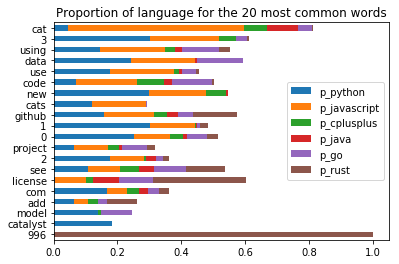

In [33]:
(word_counts
 .assign(p_python = word_counts.python / word_counts['all'],
         p_javascript = word_counts.javascript / word_counts['all'], 
         p_cplusplus = word_counts.cplusplus / word_counts['all'],
         p_java = word_counts.java / word_counts['all'], 
         p_go = word_counts.go / word_counts['all'], 
         p_rust = word_counts.rust / word_counts['all'])
 .sort_values(by='all')
 [['p_python', 'p_javascript', 'p_cplusplus', 'p_java', 'p_go', 'p_rust']]
 .tail(20)
 .sort_values('p_javascript')
 .plot.barh(stacked=True))

plt.title('Proportion of language for the 20 most common words')

# So the most common words will likely be good predictors of the language.

# All words:

In [34]:
word_freq_for_all.head(10)

1           275
use         265
cats        253
0           227
cat         226
license     219
project     205
code        203
model       187
catalyst    181
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

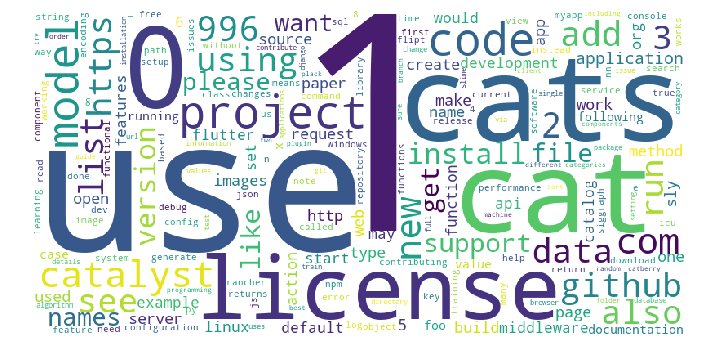

In [35]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(word_freq_for_all)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

# Create wordclouds for each language

## javascript

In [36]:
javascript_freq.head(10)

cat         125
names       112
get          73
function     60
make         59
use          53
like         50
catalog      48
build        43
cats         43
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

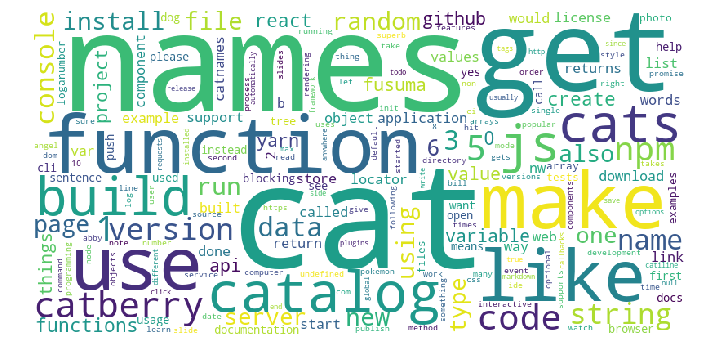

In [37]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(javascript_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## c++

In [38]:
cplusplus_freq.head(10)

windows       32
library       22
terminal      21
code          17
cat           16
console       15
please        13
catboost      13
type          12
functional    12
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

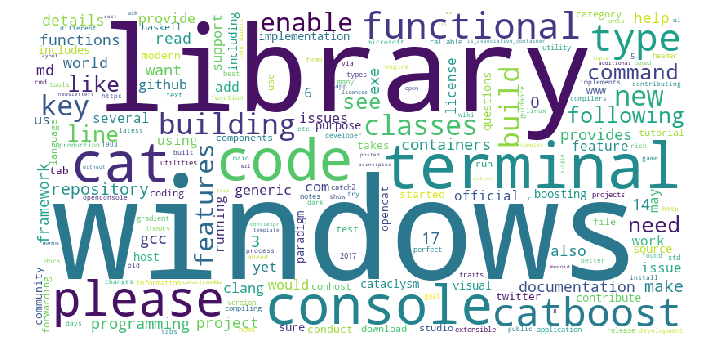

In [39]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(cplusplus_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## python 

In [40]:
python_freq.head(10)

1            83
0            57
n            54
py           53
new          51
search       48
use          47
3            44
case         43
algorithm    42
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

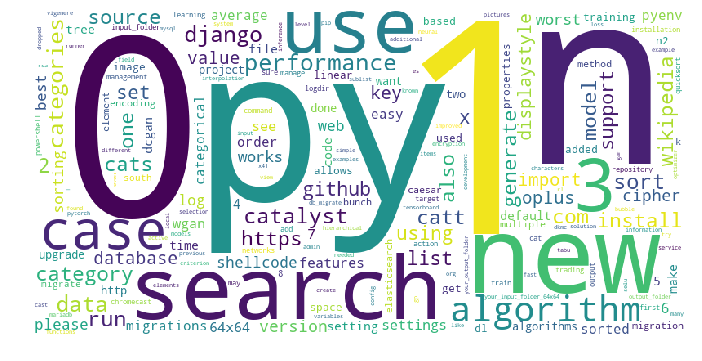

In [41]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(python_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## java

In [42]:
java_freq.head(10)

cat         22
license     18
catlog      16
mysql       13
android     10
download     9
jdbc         8
issues       8
logs         8
system       7
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

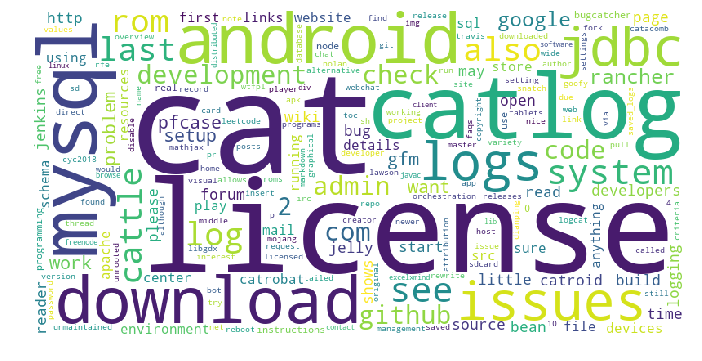

In [43]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(java_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## go

In [44]:
go_freq.head(10)

sql         54
flipt       50
sqlflow     27
code        26
ccat        25
learning    24
license     23
data        22
machine     21
ml          21
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

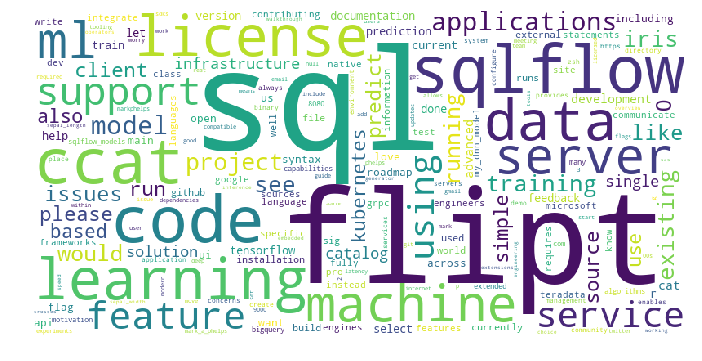

In [45]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(go_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

## rust 

In [46]:
rust_freq.head(10)

996          165
license       64
icu           55
list          45
work          40
companies     30
anti          25
open          25
source        25
please        25
dtype: int64

(-0.5, 799.5, 399.5, -0.5)

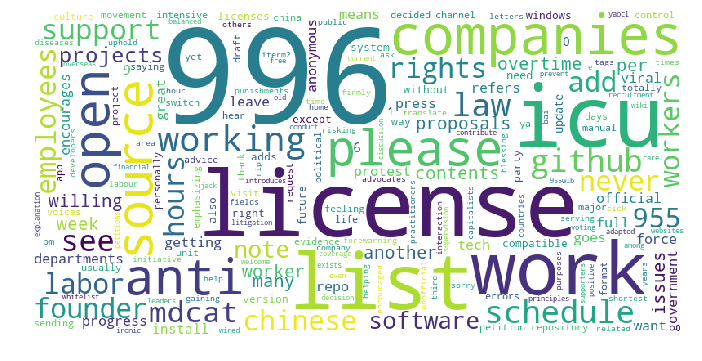

In [47]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(rust_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

In [48]:
word_freq_for_all.values[:10]

array([275, 265, 253, 227, 226, 219, 205, 203, 187, 181])

In [49]:
combined_freq_df = pd.DataFrame()
combined_freq_df['allw'] = word_freq_for_all.index[:10]
combined_freq_df['allv'] = word_freq_for_all.values[:10]

combined_freq_df['cpp_w'] = cplusplus_freq.index[:10]
combined_freq_df['cpp_v'] = cplusplus_freq.values[:10]

combined_freq_df['python_w'] = python_freq.index[:10]
combined_freq_df['python_v'] = python_freq.values[:10]

combined_freq_df['java_w'] = java_freq.index[:10]
combined_freq_df['java_v'] = java_freq.values[:10]

combined_freq_df['go_w'] = go_freq.index[:10]
combined_freq_df['go_v'] = go_freq.values[:10]

combined_freq_df['rust_w'] = rust_freq.index[:10]
combined_freq_df['rust_v'] = rust_freq.values[:10]

combined_freq_df

,allw,allv,cpp_w,cpp_v,python_w,python_v,java_w,java_v,go_w,go_v,rust_w,rust_v
0,1,275,windows,32,1,83,cat,22,sql,54,996,165
1,use,265,library,22,0,57,license,18,flipt,50,license,64
2,cats,253,terminal,21,n,54,catlog,16,sqlflow,27,icu,55
3,0,227,code,17,py,53,mysql,13,code,26,list,45
4,cat,226,cat,16,new,51,android,10,ccat,25,work,40
5,license,219,console,15,search,48,download,9,learning,24,companies,30
6,project,205,please,13,use,47,jdbc,8,license,23,anti,25
7,code,203,catboost,13,3,44,issues,8,data,22,open,25
8,model,187,type,12,case,43,logs,8,machine,21,source,25
9,catalyst,181,functional,12,algorithm,42,system,7,ml,21,please,25


# Consider the sentiment score for each language.

In [50]:
sentiment_score = pd.DataFrame()
sentiment_score['all'] = int(afinn.score(all_words))
sentiment_score['javascript'] = int(afinn.score(javascript_words))
sentiment_score['cpp'] = int(afinn.score(cplusplus_words))
sentiment_score['python'] = int(afinn.score(python_words))
sentiment_score['java'] = int(afinn.score(java_words))
sentiment_score['go'] = int(afinn.score(go_words))
sentiment_score['java'] = int(afinn.score(rust_words))
sentiment_score

,all,javascript,cpp,python,java,go


In [51]:
int(afinn.score(all_words)) # 2198

2226

In [52]:
int(afinn.score(javascript_words)) # 426

464

In [53]:
int(afinn.score(cplusplus_words)) # 178

178

In [54]:
int(afinn.score(python_words)) # 214

214

In [55]:
int(afinn.score(java_words)) # 18

18

In [56]:
int(afinn.score(go_words)) # 206

234

In [57]:
int(afinn.score(rust_words)) # 249

249

In [58]:
sentiment_scores = pd.Series(['all', 'javascript', 'cpp', 'python', 'java', 'go', 'rust'],
                             [2198, 426, 178, 214, 18, 206, 249])
sentiment_scores

2198           all
426     javascript
178            cpp
214         python
18            java
206             go
249           rust
dtype: object

# These sentiment scores seem significant and may serve as strong predictors of language.

# Now examine the length of each language's files...

In [59]:
lengths = pd.Series(['all', 'javascript', 'cpp', 'python', 'java', 'go', 'rust'],
    [len(all_words), len(javascript_words), len(cplusplus_words), len(python_words),
    len(java_words), len(go_words), len(rust_words)])
lengths

322025           all
44441     javascript
14698            cpp
52017         python
5942            java
18216             go
17794           rust
dtype: object

# The lengths also look like strong indicators!
# Now consider pairs of words.

In [60]:
languages.head(7)

,n,percent
JavaScript,21,0.175000
Python,13,0.108333
C++,9,0.075000
Java,9,0.075000
HTML,8,0.066667
Go,8,0.066667
Rust,6,0.050000


all_words - javascript_words - python_words - java_words - cplusplus_words

In [61]:
top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words.split(' '), 2))
                      .value_counts()
                      .head(20))
top_20_js_bigrams = (pd.Series(nltk.ngrams(javascript_words.split(' '), 2))
                      .value_counts()
                      .head(20))
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words.split(' '), 2))
                      .value_counts()
                      .head(20))
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words.split(' '), 2))
                      .value_counts()
                      .head(20))
top_20_cpp_bigrams = (pd.Series(nltk.ngrams(cplusplus_words.split(' '), 2))
                      .value_counts()
                      .head(20))

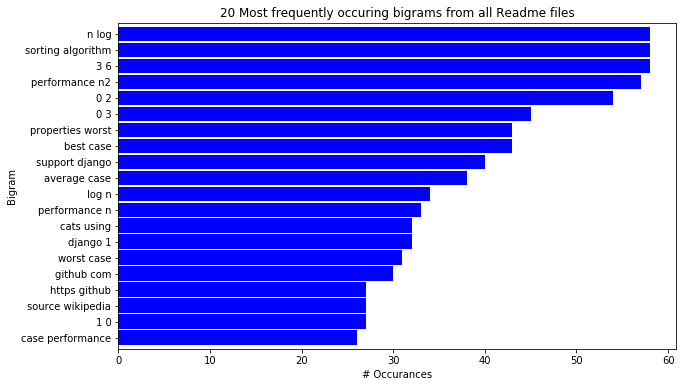

In [64]:
top_20_all_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams from all Readme files')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

Text(0.5, 1.0, 'Top 20 of ALL Bigrams')

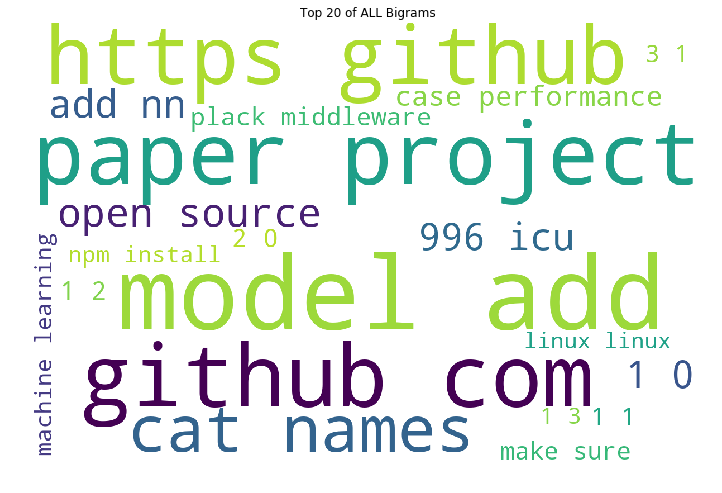

In [70]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=1200, height=800, random_state=123).generate_from_frequencies(data)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 of ALL Bigrams')

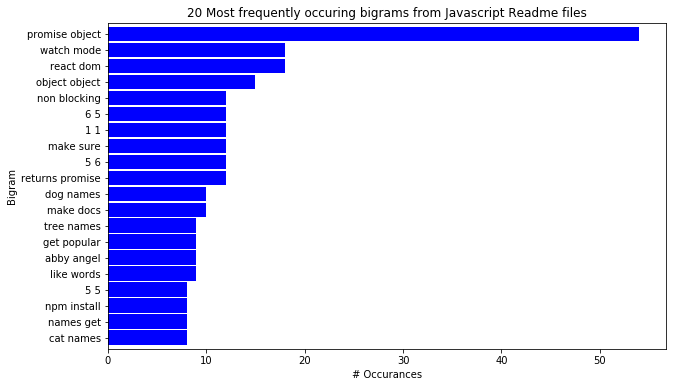

In [65]:
top_20_js_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams from Javascript Readme files')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

Text(0.5, 1.0, 'Top 20 of Javascript Bigrams')

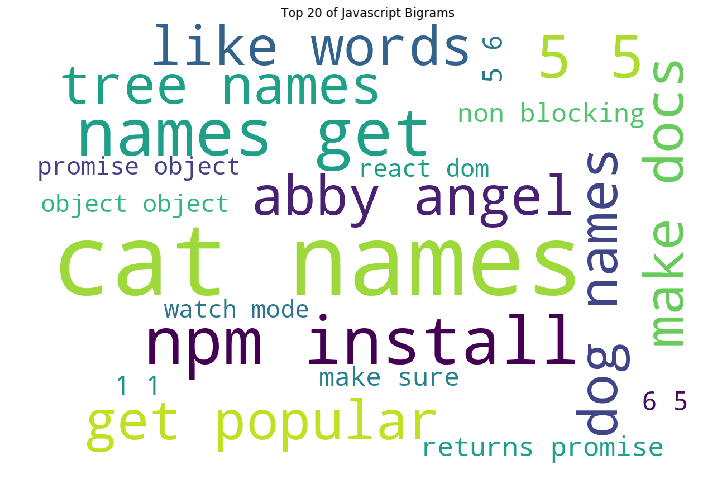

In [71]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_js_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=1200, height=800, random_state=123).generate_from_frequencies(data)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 of Javascript Bigrams')

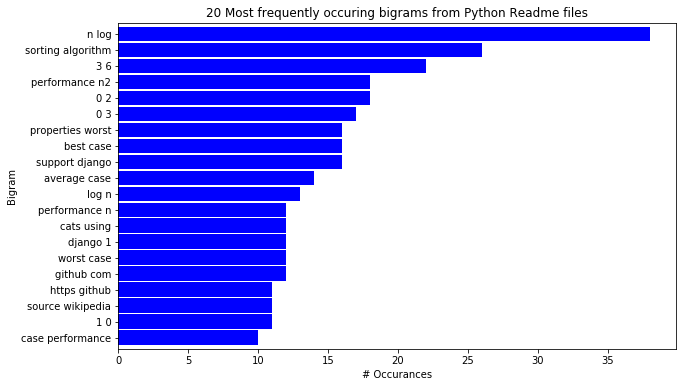

In [66]:
top_20_python_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams from Python Readme files')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

Text(0.5, 1.0, 'Top 20 of Python Bigrams')

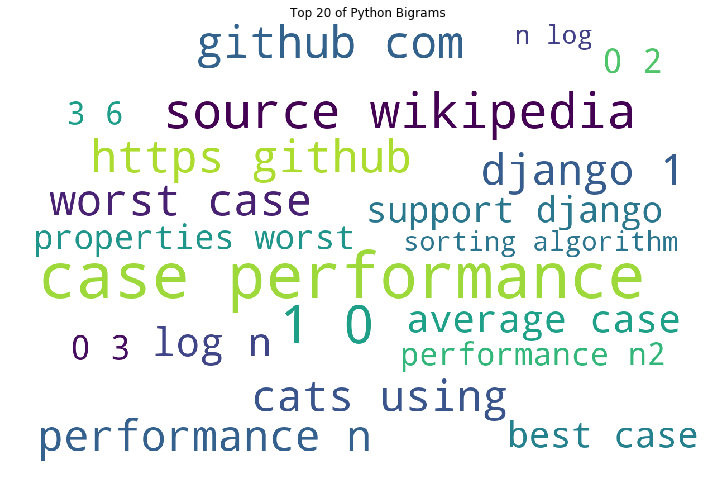

In [72]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=1200, height=800, random_state=123).generate_from_frequencies(data)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 of Python Bigrams')

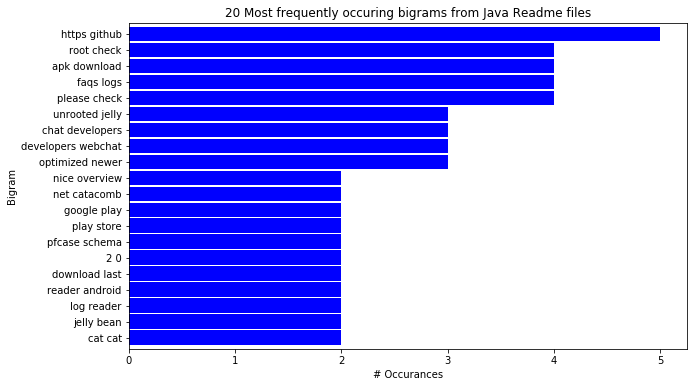

In [68]:
top_20_java_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams from Java Readme files')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_java_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

Text(0.5, 1.0, 'Top 20 of Java Bigrams')

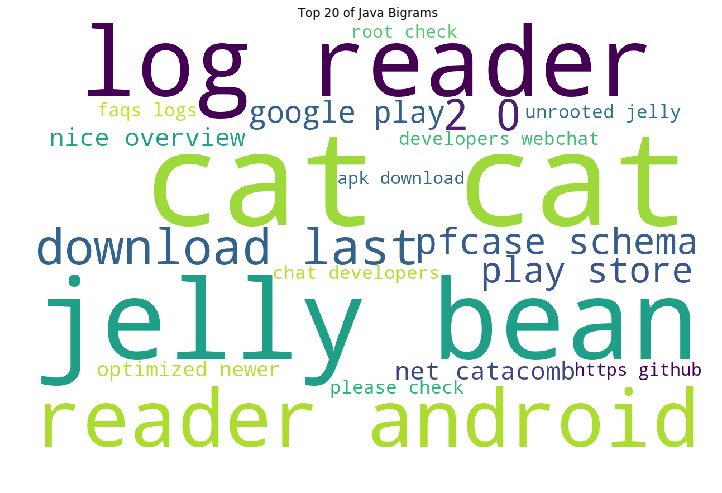

In [73]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=1200, height=800, random_state=123).generate_from_frequencies(data)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 of Java Bigrams')

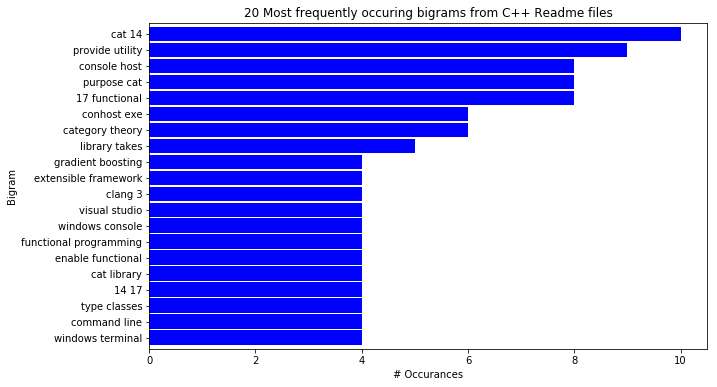

In [69]:
top_20_cpp_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams from C++ Readme files')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_cpp_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

Text(0.5, 1.0, 'Top 20 of C++ Bigrams')

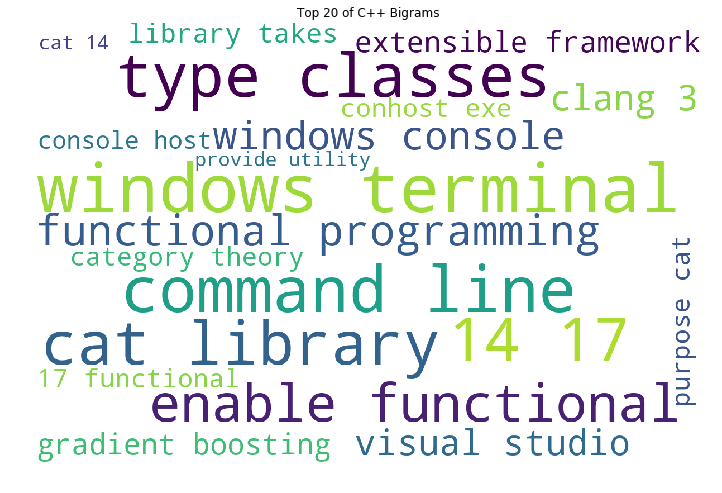

In [74]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_cpp_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=1200, height=800, random_state=123).generate_from_frequencies(data)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 of C++ Bigrams')

In [75]:
top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words.split(' '), 3))
                      .value_counts()
                      .head(20))
top_20_js_trigrams = (pd.Series(nltk.ngrams(javascript_words.split(' '), 3))
                      .value_counts()
                      .head(20))
top_20_python_trigrams = (pd.Series(nltk.ngrams(python_words.split(' '), 3))
                      .value_counts()
                      .head(20))
top_20_java_trigrams = (pd.Series(nltk.ngrams(java_words.split(' '), 3))
                      .value_counts()
                      .head(20))
top_20_cpp_trigrams = (pd.Series(nltk.ngrams(cplusplus_words.split(' '), 3))
                      .value_counts()
                      .head(20))

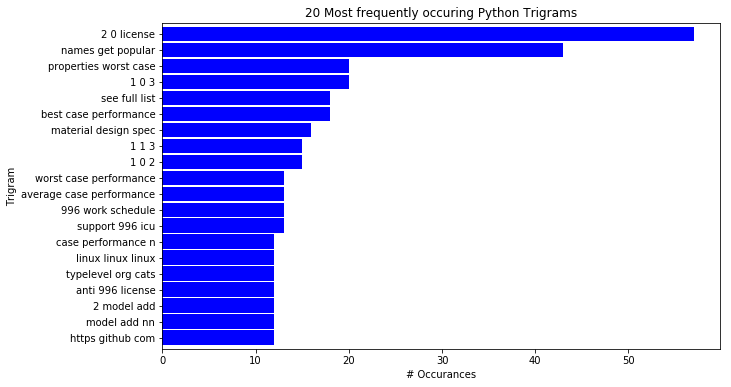

In [76]:
top_20_all_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 1199.5, 799.5, -0.5)

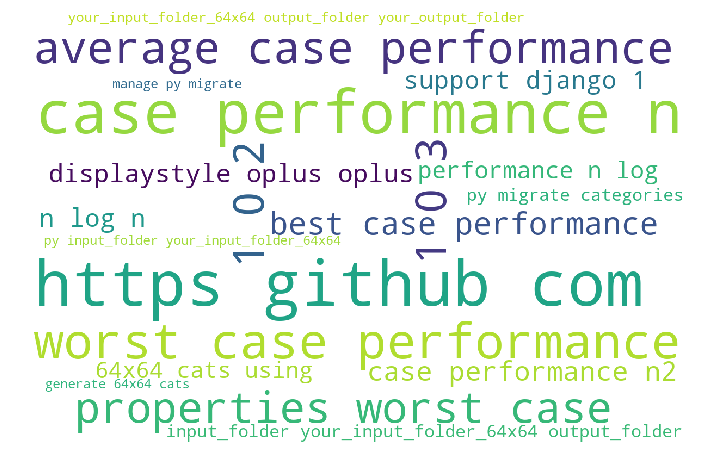

In [77]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_python_trigrams.to_dict().items()}
img_python_tri = WordCloud(background_color='white', width=1200, height=800).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img_python_tri)
plt.axis('off')

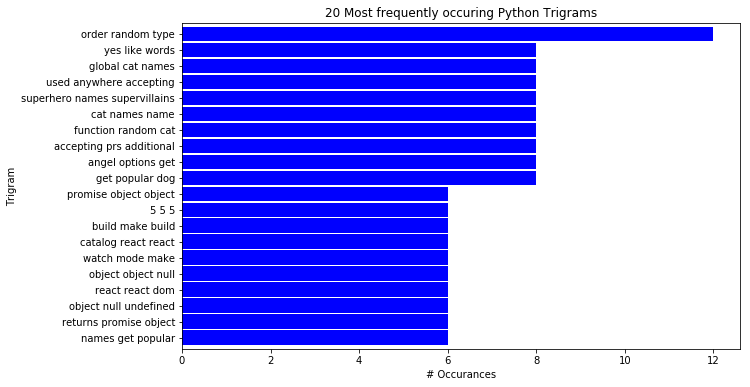

In [78]:
top_20_js_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_js_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 1199.5, 799.5, -0.5)

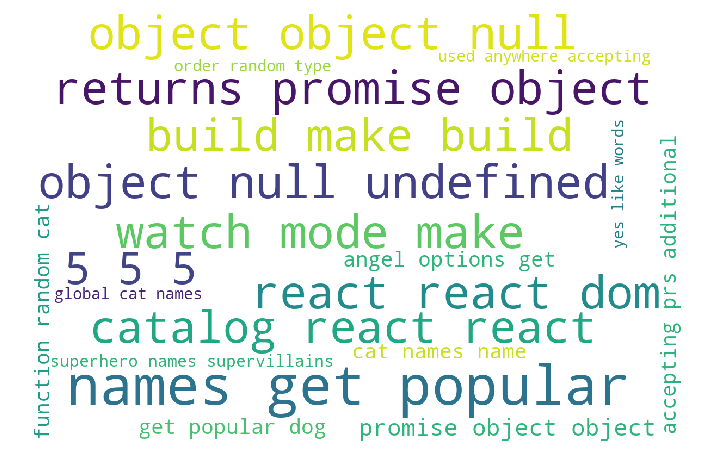

In [79]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_js_trigrams.to_dict().items()}
img_python_tri = WordCloud(background_color='white', width=1200, height=800).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img_python_tri)
plt.axis('off')

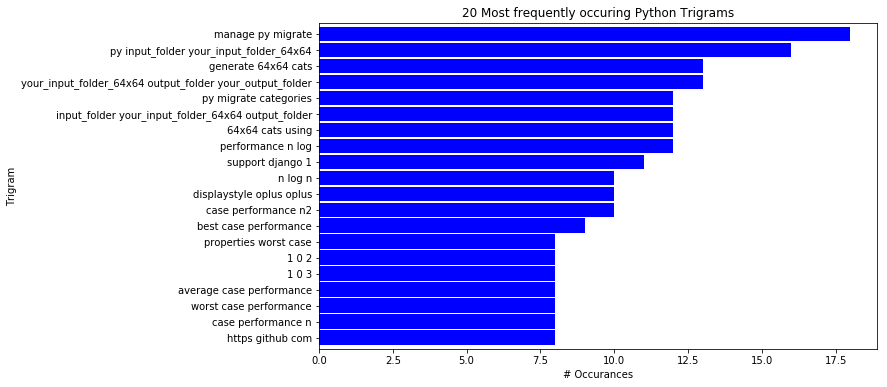

In [80]:
top_20_python_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_trigrams .reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 1199.5, 799.5, -0.5)

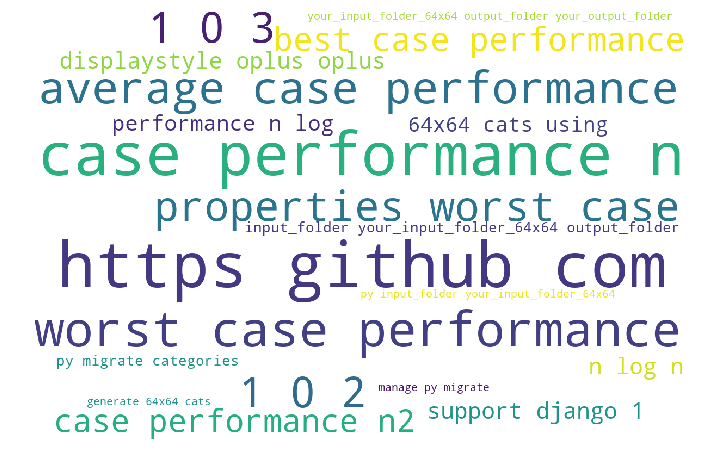

In [81]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_python_trigrams .to_dict().items()}
img_python_tri = WordCloud(background_color='white', width=1200, height=800).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img_python_tri)
plt.axis('off')

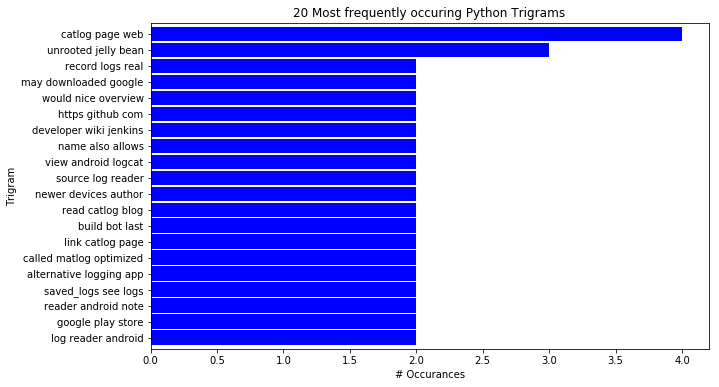

In [82]:
top_20_java_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_java_trigrams .reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 1199.5, 799.5, -0.5)

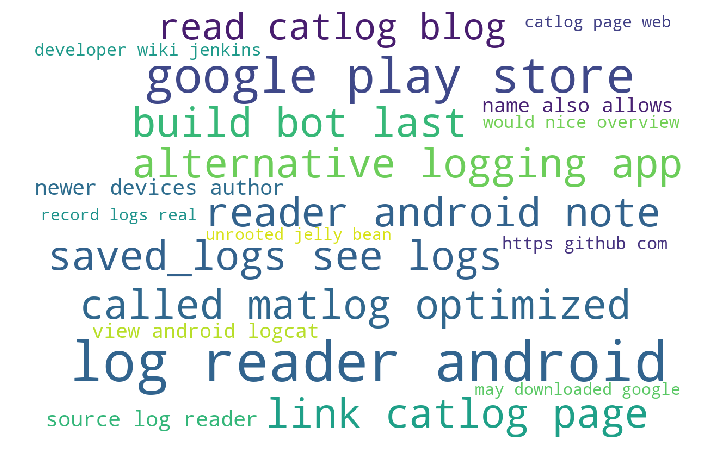

In [83]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_java_trigrams .to_dict().items()}
img_python_tri = WordCloud(background_color='white', width=1200, height=800).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img_python_tri)
plt.axis('off')

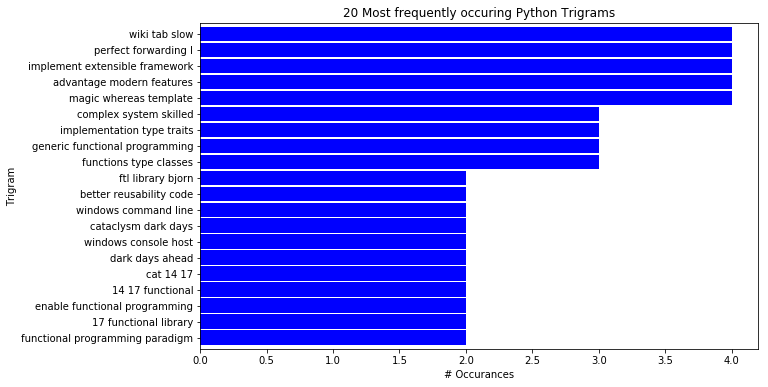

In [84]:
top_20_cpp_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_cpp_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

(-0.5, 1199.5, 799.5, -0.5)

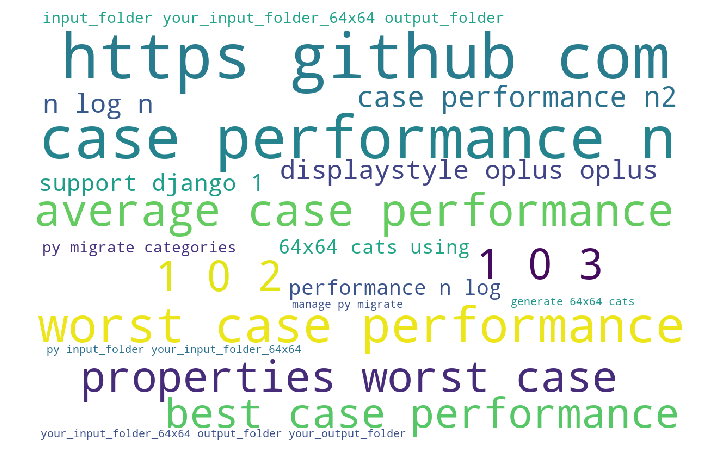

In [85]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_python_trigrams.to_dict().items()}
img_python_tri = WordCloud(background_color='white', width=1200, height=800).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img_python_tri)
plt.axis('off')